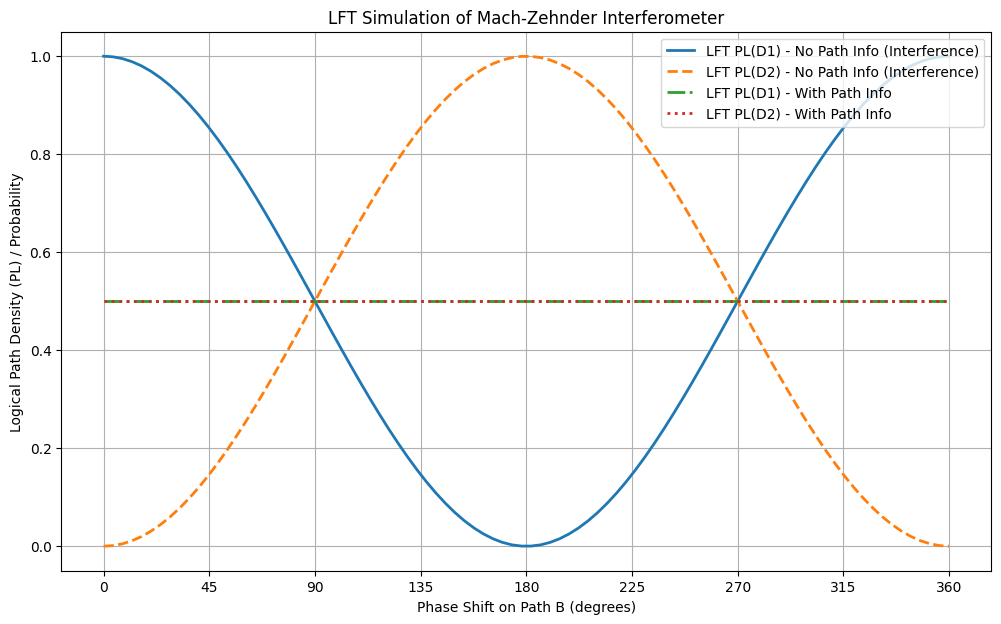

In [1]:
# %% [markdown]
# # Logic Field Theory Simulation: Quantum Interference (Mach-Zehnder)
#
# This notebook simulates the Mach-Zehnder Interferometer (MZI) using Logic Field Theory (LFT). We explore how interference patterns emerge from Logical Path Density (`PL`) when path information is absent, and how these patterns vanish when "which-path" information (WPI) logically constrains the possibilities.
#
# **Simplification:** We'll model path weights `w` incorporating phase abstractly. `Π_L` enforces path exclusivity.

# %%
import numpy as np
import matplotlib.pyplot as plt
import cmath # For complex numbers representing phase

# %% [markdown]
# ## LFT Core Functions (Adapted for Interference)

# %%
def negate(prop):
  """Simple helper for proposition negation."""
  if prop.startswith("¬"):
    return prop[1:]
  else:
    return f"¬{prop}"

# NOTE: We don't use the full Pi_L filtering extensively here, we assume
# the rules allow the outcomes and focus on PL calculation.
# A full implementation would define path rules and use Pi_L.

def calculate_MZI_PL(phase_shift_deg, which_path_info=False):
  """
  Calculates Logical Path Density (PL) for Detector D1 in an MZI.

  Args:
    phase_shift_deg (float): Phase shift applied to path B (degrees).
    which_path_info (bool): If True, simulates having definitive which-path info.

  Returns:
    tuple: (PL_D1, PL_D2), probability for detector 1 and detector 2.
  """

  # Represent paths abstractly with complex amplitudes (to encode phase for PL calculation)
  # This is analogous to QM, but LFT aims to derive this from logical path weights 'w'.
  # Assume initial amplitude 1, split equally at BS1.
  amp_path_A = 1 / np.sqrt(2)
  amp_path_B = 1 / np.sqrt(2)

  # Apply phase shift to path B
  phase_shift_rad = np.radians(phase_shift_deg)
  amp_path_B *= cmath.exp(1j * phase_shift_rad)

  # Simulate Which-Path Detection (WPD) - Crucial LFT step conceptually
  # If WPI exists, the paths become logically distinct and cannot interfere
  # in the PL calculation. We simulate this by calculating probabilities separately.
  if which_path_info:
      # Path A contribution to detectors (50/50 split at BS2)
      prob_D1_from_A = abs(amp_path_A / np.sqrt(2))**2
      prob_D2_from_A = abs(amp_path_A / np.sqrt(2))**2
      # Path B contribution to detectors (50/50 split at BS2)
      prob_D1_from_B = abs(amp_path_B / np.sqrt(2))**2
      prob_D2_from_B = abs(amp_path_B / np.sqrt(2))**2

      # In LFT, PL is the sum of probabilities for logically distinct paths
      PL_D1 = prob_D1_from_A + prob_D1_from_B
      PL_D2 = prob_D2_from_A + prob_D2_from_B

  else: # No Which-Path Info - Paths are logically coherent alternatives
      # Combine amplitudes at BS2 before calculating probability (Interference)
      # Amp at D1 = (AmpA + AmpB*exp(i*phi))/sqrt(2) [relative phases matter]
      # Assuming BS2 transformation: |A> -> (|D1> + |D2>)/sqrt(2), |B> -> (|D1> - |D2>)/sqrt(2)
      # Or simpler: D1 = (A+B)/sqrt(2), D2 = (A-B)/sqrt(2) effect. Let's use this.
      # Final amplitude reaching D1
      amp_D1 = (amp_path_A + amp_path_B) / np.sqrt(2)
      # Final amplitude reaching D2
      amp_D2 = (amp_path_A - amp_path_B) / np.sqrt(2) # Assumes a specific BS phase relation

      # PL is proportional to the squared magnitude of the total amplitude
      # LFT Interpretation: The 'weight' w reflects this coherent sum
      PL_D1 = abs(amp_D1)**2
      PL_D2 = abs(amp_D2)**2

  # Normalize (should be close to 1)
  total_PL = PL_D1 + PL_D2
  if total_PL > 1e-9:
    return PL_D1 / total_PL, PL_D2 / total_PL
  else:
    return 0.5, 0.5 # Fallback for zero total probability

# %% [markdown]
# ## Simulation: MZI Interference vs Phase

# %%
# --- Simulation Setup ---
phase_shifts = np.linspace(0, 360, 90) # Phase shift from 0 to 360 degrees

# --- LFT Simulation (No WPI) ---
mzi_probs_d1_no_wpi = []
mzi_probs_d2_no_wpi = []
for phase in phase_shifts:
    pl_d1, pl_d2 = calculate_MZI_PL(phase, which_path_info=False)
    mzi_probs_d1_no_wpi.append(pl_d1)
    mzi_probs_d2_no_wpi.append(pl_d2)

# --- LFT Simulation (With WPI) ---
mzi_probs_d1_wpi = []
mzi_probs_d2_wpi = []
for phase in phase_shifts:
    pl_d1, pl_d2 = calculate_MZI_PL(phase, which_path_info=True)
    mzi_probs_d1_wpi.append(pl_d1)
    mzi_probs_d2_wpi.append(pl_d2)

# --- Plotting ---
plt.figure(figsize=(12, 7))

plt.plot(phase_shifts, mzi_probs_d1_no_wpi, '-', label='LFT PL(D1) - No Path Info (Interference)', linewidth=2)
plt.plot(phase_shifts, mzi_probs_d2_no_wpi, '--', label='LFT PL(D2) - No Path Info (Interference)', linewidth=2)

plt.plot(phase_shifts, mzi_probs_d1_wpi, '-.', label='LFT PL(D1) - With Path Info', linewidth=2)
plt.plot(phase_shifts, mzi_probs_d2_wpi, ':', label='LFT PL(D2) - With Path Info', linewidth=2)


plt.xlabel("Phase Shift on Path B (degrees)")
plt.ylabel("Logical Path Density (PL) / Probability")
plt.title("LFT Simulation of Mach-Zehnder Interferometer")
plt.legend()
plt.grid(True)
plt.ylim(-0.05, 1.05)
plt.xticks(np.arange(0, 361, 45))
plt.show()

# %% [markdown]
# ## Interpretation
#
# The simulation demonstrates key LFT concepts:
#
# 1.  **Interference (No WPI):** When there's no logical proposition fixing the path taken, both paths contribute coherently to the final outcome. The `PL` calculation (mimicking coherent summation via complex amplitudes here) results in phase-dependent probabilities at the detectors, showing interference fringes.
# 2.  **Loss of Interference (With WPI):** When which-path information exists (e.g., `P(path, A)` is added to the state), the paths become logically distinct histories within the DAG (`DL`). `Π_L` would enforce consistency with this path info. The `PL` calculation now involves summing probabilities from these distinct logical branches (simulated by `which_path_info=True`), resulting in a constant 50/50 distribution, independent of phase. Interference vanishes because the logical basis for coherent path summation is removed.
#
# LFT explains interference as arising from the density of coherent logical possibilities, and its disappearance as a consequence of adding information that logically distinguishes those possibilities.